# Global Observations of Nonlinear Mesoscale Eddies 
## Introduction
<div class="alert alert-block alert-info">
<b>The purpose of this notebook is to:</b>
    <li>Read in eddy-tracking datasets</li>
    <li>Process the datasets to only include WCR- and CCR-like eddies in the Northwest Atlantic</li>
    <li>Plot the formation patterns, seasonal cycles, and formation trends of the eddies</li>
</div>

### Datasets: 
☆<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta2-0-dt.html">The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0) </a> <br>
The primary dataset used in this notebook is *The Altimetric Mesoscale Eddy Trajectories Atlas (META2.0)* and colloquially referred to the *Chelton eddy tracks* here. The current verison of the Chelton eddy dataset is described in <a href="https://www.aviso.altimetry.fr/fileadmin/documents/data/products/value-added/Schlax_Chelton_2016.pdf"> Schlax & Chelton, 2016</a> which built upon <a href="https://www.sciencedirect.com/science/article/pii/S0079661111000036"> Chelton et al., 2011</a>. 

<a href="https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product/meta3-1-exp-dt.html">The Mesoscale Eddy Trajectories Atlas (META3.1EXP) </a> <br>
The *Mesoscale Eddy Trajectories Atlas Product Verison 3.1 Experimental Delayed Time (META3.1EXP DT)* was first published in March 2022 and is an update to META2.0. The details of this dataset are described <a href="https://essd.copernicus.org/articles/14/1087/2022/"> Pegliasco et al., 2022</a> which inherited an eddy-tracking algorithm developed by <a href="https://journals.ametsoc.org/view/journals/atot/31/5/jtech-d-14-00019_1.xml"> Mason et al., 2014</a> that is inpsired by Chelton et al., 2011.

<a href="https://zenodo.org/record/7349753">The Global Lagrangian Eddy Dataset (GLED v1.0) </a> <br>
The third eddy dataset differs from the META datasets because it uses Lagrangian methods to identify and track eddies. This dataset was created by <a href="https://essd.copernicus.org/articles/15/1765/2023/"> Liu and Abernathy, 2023</a> as the Lagrangian alternative to Eulerian eddy datasets like the Chelton eddy tracks and all the successive Eulerian eddy datasets inspired by Chelton et al., 2011. 

<a href="https://www.bco-dmo.org/dataset/810182">Yearly census of Gulf Stream Warm Core Ring formation from 1980 to 2017</a><br>
The WCR census uses the <a href="https://jcgulfstream.com/charts/">Clark charts</a> to document the formation and demise times and locations, and the area at formation for all WCRs formed between 1980 and 2017 that lived for a week or more. 

### Motivation: 
<a href="https://www.nature.com/articles/s41598-019-48661-9"> Gangopadhyay et al., 2019</a> found a regime shift in the number of warm core rings formations between 1980–1999 and 2000–2017. <a href="https://www.nature.com/articles/s41598-021-81827-y"> Silver et al., 2021</a> expanded upon this work and also found a regime shift in warm core rings, but *no* regime shift in cold core rings. **We seek to understand if a regime shift, and similar results, can be detected using a global mesoscale eddy dataset such as META2.0.** 

<div class="alert alert-block alert-info">
<b>The goal of this work is to:</b>
    <li>Repeat similar analyses as Silver et al., 2021 for eddy datasets that have been filtered to only include warm core ring- and cold core ring-like eddies</li>
    <li>Check if these eddy datasets detect a regime shift in Gulf Stream rings</li>
    <li>Analyize the formation patterns, seasonal cycles, and formation trends of the eddies</li>
    <li>Test if META2.0 and similar products could be used to study Gulf Stream rings</li>
</div>

<div class="alert alert-block alert-warning">
<b>Note:</b> The META2.0 dataset, or Chelton eddy tracks, are no longer recommended for use. Instead, AVISO reccomends using META3.1EXP. When this project began, that warning did not exist and META3.1EXP had not been published. Hence why we primarily use the META2.0 dataset.
</div>
    
## Import Functions:

In [1]:
%%time
# adds upper level to working directory
import sys
sys.path.append("..")

# import the util functions
from utils.ring_data_utils import *
from utils.ring_plot_utils import *

CPU times: user 1.47 s, sys: 210 ms, total: 1.68 s
Wall time: 2.15 s


### File Structure

This project's folder looks like:<br>
<UL> <b>rings
      <UL> data <br>
      <UL> dataframes <br> </UL>
      <UL> GLED <br> </UL>
      <UL> gulf_stream <br> </UL>
      <UL> META <br> </UL>
      <UL> OISST <br> </UL>
      <UL> ring_census <br> </UL>
      <UL> SSH <br> </UL>
      <b>figures<br>
      <UL> animation_plots</UL>
      <b>rings_repo <br>
      <UL> <font color='red'>notebooks ☆</font> <br>
      utils <br></UL> </b> </b> </b> 
</UL>

## Process Data:
Only un-comment the cell below if you want to (re-)create these pandas dataframes (which are used in the rest of the notebook). After this cell has been run once, you will have all the necessary dataframes saved in the data/dataframes folder.

<br>
    
<UL> <b>data</b>
      <UL> <b>dataframes</b> <br>
      <UL> nwa_<font color='blue'>ccr</font>like_eddies.pkl <br> </UL>
      <UL> nwa_<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
      <UL> zone_<font color='blue'>ccr</font>like_yyyy_mm_formations <br> </UL>
      <UL> zone_<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
</UL>
</UL>
<br> 

<div class="alert alert-block alert-danger">
<b>Note:</b> If the DataFrames above already exist, do not run the next cell; proceed to the "Load data" cell.
</div>

In [3]:
# %%time
# This function takes ~38 minutes to run, ~18 min per dataframe
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    meta2_eddy_to_nwa_ringlike_eddies                                                                     "
"                                                                                                         "
" Description:                                                                                            "
"    The meta2_eddy_to_nwa_ringlike_eddies function reads in META eddy datasets and converts it to         " 
"    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
"    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
"                                                                                                         "
" Input:                                                                                                  " 
"    path (String)         : path to where the META eddy dataset is stored                                "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# This function takes ~4 seconds to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
" Function:                                                                                               "
"    eddy_df_to_formation_counts_df                                                                    "
"                                                                                                         "
" Description:                                                                                            "
"    The eddy_df_to_formation_counts_df takes filtered wcr- & ccr-like eddy dataframes and creates        " 
"    dataframes that tally formations of rings for all zones by year (e.g., zone_wcr_yyyy_formations)     "
"    as well as formations by month and year (e.g., zone_wcr_yyyy_mm_formations) then saves those         "
"    dataframes in the data/dataframes folder.                                                            "
"                                                                                                         "
" Input:                                                                                                  " 
"    eddy_wcr_df (DataFrame) : pandas dataframe of eddy trajectories for wcr-like eddies                  "
"    eddy_ccr_dr (DataFrame) : pandas dataframe of eddy trajectories for ccr-like eddies                  "
"                                                                                                         "
" Output:                                                                                                 "
"    (None)                  :  saves formation counts dataframes in the data/dataframes folder           "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# How to proceed
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                                                                                         "
"  Uncomment the 3 lines below to create the ring-like eddy dataframes from the META2.0 eddy dataset      "
"  and create the formation counts dataframes. Note: make sure your path is correct                       "
"                                                                                                         "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# path_to_META2 = '/Users/elenaperez/Desktop/rings/data/META/META2_0/eddy_trajectory_dt_2.0_19930101_20200307.nc'
# meta2_eddy_to_nwa_eddylike_rings(path_to_META2)
# eddy_df_to_formation_counts_df()


## Load Data:

This project's data folder looks like:
<br>
    
<UL> <b>data</b>
      <UL> nwa_bathy.nc <br>
      <UL> <b>dataframes</b> <br>
          <UL> nwa_<font color='blue'>c</font>/<font color='red'>wcr</font>like_eddies.pkl <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_formations <br> </UL>
          <UL> zone_<font color='blue'>c</font>/<font color='red'>wcr</font>like_yyyy_mm_formations <br> </UL>
      <b>GLED</b> <br>
          <UL> eddy_info_30d.json <br> </UL>
          <UL> eddy_info_90d.json <br> </UL>
          <UL> eddy_info_180d.json <br> </UL>
      <b>gulf_stream</b> <br>
          <UL> GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat <br> </UL>
      <b>META</b> <br>
          <UL> <b> META2_0 </b> <br> 
              <UL> eddy_trajectory_dt_2.0_19930101_20200307.nc <br> </UL> </UL>
          <UL> <b> META3_1 </b> <br> 
              <UL> META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc <br> </UL>
              <UL> META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc <br> </UL> </UL>
      <b>OISST</b> <br>
              <UL> oisst-avhrr-v02r01.19950109.nc <br> </UL>
      <b>ring_census</b> <br>
              <UL> bcodmo_dataset_810182_712b_5843_9069 <br> </UL>
      <b>SSH</b> <br>
          <UL> sealevel_glo_phy_199301_201712.nc <br> </UL>
</UL>
</UL>
<br>

See "Datasets" section above for data availability of GLED, META, ring_census data. <br>
    
Gulf Stream daily paths are identified using the 25 cm sea surface height contour. See [Andres 2016](https://agupubs.onlinelibrary.wiley.com/doi/10.1002/2016GL069966) for more information on deriving Gulf Stream paths. <br>
    
Sea surface temperature (SST) data is available through NOAA's 1/4° Daily Optimum Interpolation Sea Surface Temperature [(OISST)](https://www.ncei.noaa.gov/products/optimum-interpolation-sst). <br>

Monthly sea surface height (SSH) data is available through the Copernicus Marine Environment Monitoring Survey's (CMEMS) Global Ocean Gridded Sea Surface Height product [(SEALEVEL_GLO_PHY_L4_MY_008_047)](https://data.marine.copernicus.eu/product/SEALEVEL_GLO_PHY_L4_MY_008_047/description). <br>
    
Gridded bathymetry data of the worlds ocean is available from [GEBCO](https://www.gebco.net/data_and_products/gridded_bathymetry_data/). The bathymetry file I use is trimmed down to the Northwest Atlantic 24N–53N, 82W–48W .<br>

<div class="alert alert-block alert-warning">
<b>Note:</b> Gulf Stream paths and bathymetry are read in for data processing (<i> utils/ring_data_utils.py </i>). SST and SSH data are read in for plotting (<i> utils/ring_plot_utils.py </i>).
</div>


In [35]:
%%time
# This cell takes about 25 ms to run
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                           Bathymetry for the Northwest Atlantic (24N–53N, 82W–48W)                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

bathy = xr.open_dataset('/Users/elenaperez/Desktop/rings/data/nwa_bathy.nc')


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     Daily Gulf Stream Paths (1993-2022)                                 "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# load GS file
gs = loadmat('/Users/elenaperez/Desktop/rings/data/gulf_stream/GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat')

# convert time array to ordinal dates
for d in range(len(gs['time'][0])-1):
    gs['time'][0][d] = gs['time'][0][d]+date.toordinal(date(1950,1,1))
    

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META2.0 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# META2.0 ring-like eddies
m2_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_nwa_ccrlike_eddies.pkl')
m2_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_nwa_wcrlike_eddies.pkl') 

# annual formation counts by zone for zone_wcrs/ccrs
m2_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_wcrlike_yyyy_formations.pkl') 
m2_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
m2_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_wcrlike_yyyy_mm_formations.pkl') 
m2_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta2_zone_ccrlike_yyyy_mm_formations.pkl') 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                     META3.1 WCR- & CCR-like eddies                                      "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# META3.1 ring-like eddies
m31_zone_ccrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_ccrlike_eddies.pkl')
m31_zone_wcrlike_eddies = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_wcrlike_eddies.pkl') 

# annual formation counts by zone for zone_wcrs/ccrs
m31_zone_wcrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_wcrlike_yyyy_formations.pkl') 
m31_zone_ccrlike_yyyy_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_ccrlike_yyyy_formations.pkl') 

# monthly formation counts by zone for zone_wcrs/ccrs
m31_zone_wcrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_wcrlike_yyyy_mm_formations.pkl') 
m31_zone_ccrlike_yyyy_mm_formations = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_zone_ccrlike_yyyy_mm_formations.pkl') 


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                                      GLED WCR- & CCR-like eddies                                        "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""



CPU times: user 314 ms, sys: 59.7 ms, total: 373 ms
Wall time: 393 ms


'""\n"                                      GLED WCR- & CCR-like eddies                                        "\n'

In [29]:
%%time
def meta31_eddy_to_nwa_ringlike_eddies(path_anticyclonic, path_cyclonic):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    " Function Description:                                                                                   "
    "    The meta31_eddy_to_nwa_ringlike_eddies function reads in META3.1exp eddy datasets and converts it to         " 
    "    a pandas dataframe, filters out eddies that don't qualify as WCR-like or CCR-like, and saves         "
    "    the WCR-like and CCR-like eddy dataframes in the data/dataframes folder.                             "
    "                                                                                                         "
    " Input:                                                                                                  " 
    "    path (String)         : path to where the META eddy dataset is stored                                "
    "                                                                                                         "
    " Output:                                                                                                 "
    "    (None)                : saves pandas dataframe of eddy trajectories for wcr-like and ccr-like eddies "
    "                                                                                                         "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                      read in META eddy trajectory datasets & Gulf Stream paths                          "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # read in META3.1exp .nc files as xarray dataset
    meta31_a_ds = xr.open_dataset(path_anticyclonic)
    meta31_c_ds = xr.open_dataset(path_cyclonic)

    # change longitude (0-360) --> (-180 to 180)
    meta31_a_ds = meta31_a_ds.assign_coords(longitude=((meta31_a_ds.longitude + 180) % 360) - 180, latitude=meta31_a_ds.latitude)
    meta31_c_ds = meta31_c_ds.assign_coords(longitude=((meta31_c_ds.longitude + 180) % 360) - 180, latitude=meta31_c_ds.latitude)

    # for convience call the Dataet x_ds
    a_ds = meta31_a_ds
    c_ds = meta31_c_ds

    # create cyclonic_type column to put in pandas DataFrame
    anticyclonic_arr = np.full(shape=len(meta31_a_ds.longitude), fill_value=1)
    cyclonic_arr = np.full(shape=len(meta31_c_ds.longitude), fill_value=-1)

    # convert xarray DataSet to pandas DataFrame
    anticyclonic_df = pd.DataFrame({'amplitude': np.array(a_ds.amplitude), 'cyclonic_type': anticyclonic_arr, 'latitude': np.array(a_ds.latitude), 'longitude': np.array(a_ds.longitude), 'observation_flag' :  np.array(a_ds.observation_flag), 'observation_number' : np.array(a_ds.observation_number), 'speed_average' : np.array(a_ds.speed_average), 'speed_radius' : np.array(a_ds.speed_radius), 'time' : np.array(a_ds.time), 'track' : np.array(a_ds.track)})
    cyclonic_df = pd.DataFrame({'amplitude': np.array(c_ds.amplitude), 'cyclonic_type': cyclonic_arr, 'latitude': np.array(c_ds.latitude), 'longitude': np.array(c_ds.longitude), 'observation_flag' :  np.array(c_ds.observation_flag), 'observation_number' : np.array(c_ds.observation_number), 'speed_average' : np.array(c_ds.speed_average), 'speed_radius' : np.array(c_ds.speed_radius), 'time' : np.array(c_ds.time), 'track' : np.array(c_ds.track)})
    
    # load GS file
    gs = loadmat('/Users/elenaperez/Desktop/rings/data/gulf_stream/GS_daily_CMEMS_047_50cm_contours_1993_to_nrt.mat')

    # convert time array to ordinal dates
    for d in range(len(gs['time'][0])-1):
        gs['time'][0][d] = gs['time'][0][d]+date.toordinal(date(1950,1,1))
    
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                        restrict dataframe to nwa box & change lon to -180 to 180                        "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # bounding box for NWA based on Gangopadhyay et al., 2019
    zone_lat = [30,45] # N
    zone_lon = [[-75,-55],[-75,-70],[-70,-65],[-65,-60],[-60,-55]] # W ... 0 –> all zones, 1 –> zone 1, etc.

    # cut eddy trajectory dataframe down to NWA region
    anticyclonic_eddy_df = anticyclonic_df[(anticyclonic_df['longitude'] >= zone_lon[0][0]) & (anticyclonic_df['longitude'] <= zone_lon[0][1]) & (anticyclonic_df['latitude'] >= zone_lat[0]) & (anticyclonic_df['latitude'] <= zone_lat[1]) & (anticyclonic_df['time'].dt.year<2018)]
    cyclonic_eddy_df = cyclonic_df[(cyclonic_df['longitude'] >= zone_lon[0][0]) & (cyclonic_df['longitude'] <= zone_lon[0][1]) & (cyclonic_df['latitude'] >= zone_lat[0]) & (cyclonic_df['latitude'] <= zone_lat[1]) & (cyclonic_df['time'].dt.year<2018)]


    """"""""""""""""""""""""""""""""""""""" wcr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
    wcrlike_tracks = []
    # loop through each eddy to determine if it is wcr-like
    for i in np.array(anticyclonic_eddy_df['track'].unique()):
        eddy = anticyclonic_eddy_df[anticyclonic_eddy_df['track']==i]
            if is_wcrlike(eddy, gs).all():
                wcrlike_tracks.append(i)

    # only incude eddies that are wcr-like
    eddy_wcrlike_df = anticyclonic_eddy_df[anticyclonic_eddy_df['track'].isin(wcrlike_tracks)]


    # """"""""""""""""""""""""""""""""""""""" ccr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
    ccrlike_tracks = []
    # loop through each eddy to determine if it is ccr-like
    for i in np.array(cyclonic_eddy_df['track'].unique()):
        eddy = cyclonic_eddy_df[cyclonic_eddy_df['track']==i]
            if is_ccrlike(eddy, gs).all():
                ccrlike_tracks.append(i)

    # only incude eddies that are wcr-like
    eddy_ccrlike_df = cyclonic_eddy_df[cyclonic_eddy_df['track'].isin(ccrlike_tracks)]
    
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                       save filtered dataframes for wcr- & ccr-like eddies                               "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # save wcr-like df as pickled file
    eddy_wcrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_wcrlike_eddies.pkl')
    
    # save ccr-like df as pickled file
    eddy_ccrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_ccrlike_eddies.pkl') 

    
path_to_META31_anticyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc'
path_to_META31_cyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc'

    
meta31_eddy_to_nwa_ringlike_eddies(path_to_META31_anticyclonic, path_to_META31_cyclonic)


In [24]:
%%time
path_anticyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Anticyclonic_long_19930101_20200307.nc'
path_cyclonic = '/Users/elenaperez/Desktop/rings/data/META/META3_1/META3.1exp_DT_allsat_Cyclonic_long_19930101_20200307.nc'

    
# read in META3.1exp .nc files as xarray dataset
meta31_a_ds = xr.open_dataset(path_anticyclonic)
meta31_c_ds = xr.open_dataset(path_cyclonic)

# change longitude (0-360) --> (-180 to 180)
meta31_a_ds = meta31_a_ds.assign_coords(longitude=((meta31_a_ds.longitude + 180) % 360) - 180, latitude=meta31_a_ds.latitude)
meta31_c_ds = meta31_c_ds.assign_coords(longitude=((meta31_c_ds.longitude + 180) % 360) - 180, latitude=meta31_c_ds.latitude)

# for convience call the Dataet x_ds
a_ds = meta31_a_ds
c_ds = meta31_c_ds

# create cyclonic_type column to put in pandas DataFrame
anticyclonic_arr = np.full(shape=len(meta31_a_ds.longitude), fill_value=1)
cyclonic_arr = np.full(shape=len(meta31_c_ds.longitude), fill_value=-1)

# convert xarray DataSet to pandas DataFrame
anticyclonic_df = pd.DataFrame({'amplitude': np.array(a_ds.amplitude), 'cyclonic_type': anticyclonic_arr, 'latitude': np.array(a_ds.latitude), 'longitude': np.array(a_ds.longitude), 'observation_flag' :  np.array(a_ds.observation_flag), 'observation_number' : np.array(a_ds.observation_number), 'speed_average' : np.array(a_ds.speed_average), 'speed_radius' : np.array(a_ds.speed_radius), 'time' : np.array(a_ds.time), 'track' : np.array(a_ds.track)})
cyclonic_df = pd.DataFrame({'amplitude': np.array(c_ds.amplitude), 'cyclonic_type': cyclonic_arr, 'latitude': np.array(c_ds.latitude), 'longitude': np.array(c_ds.longitude), 'observation_flag' :  np.array(c_ds.observation_flag), 'observation_number' : np.array(c_ds.observation_number), 'speed_average' : np.array(c_ds.speed_average), 'speed_radius' : np.array(c_ds.speed_radius), 'time' : np.array(c_ds.time), 'track' : np.array(c_ds.track)})

"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                        restrict dataframe to nwa box & change lon to -180 to 180                        "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

# bounding box for NWA based on Gangopadhyay et al., 2019
zone_lat = [30,45] # N
zone_lon = [[-75,-55],[-75,-70],[-70,-65],[-65,-60],[-60,-55]] # W ... 0 –> all zones, 1 –> zone 1, etc.

# cut eddy trajectory dataframe down to NWA region
anticyclonic_eddy_df = anticyclonic_df[(anticyclonic_df['longitude'] >= zone_lon[0][0]) & (anticyclonic_df['longitude'] <= zone_lon[0][1]) & (anticyclonic_df['latitude'] >= zone_lat[0]) & (anticyclonic_df['latitude'] <= zone_lat[1]) & (anticyclonic_df['time'].dt.year<2018)]
cyclonic_eddy_df = cyclonic_df[(cyclonic_df['longitude'] >= zone_lon[0][0]) & (cyclonic_df['longitude'] <= zone_lon[0][1]) & (cyclonic_df['latitude'] >= zone_lat[0]) & (cyclonic_df['latitude'] <= zone_lat[1]) & (cyclonic_df['time'].dt.year<2018)]


CPU times: user 7.67 s, sys: 6.5 s, total: 14.2 s
Wall time: 22.1 s


In [28]:
%%time
wcrlike_tracks = []
# loop through each eddy to determine if it is wcr-like
for i in np.array(anticyclonic_eddy_df['track'].unique()):
    eddy = anticyclonic_eddy_df[anticyclonic_eddy_df['track']==i]
    if is_wcrlike(eddy).all():
        wcrlike_tracks.append(i)

# only incude eddies that are wcr-like
eddy_wcrlike_df = anticyclonic_eddy_df[anticyclonic_eddy_df['track'].isin(wcrlike_tracks)]

eddy_wcrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_wcrlike_eddies.pkl')


In [11]:
%%time
# """"""""""""""""""""""""""""""""""""""" ccr-like eddies """""""""""""""""""""""""""""""""""""""""""""""""""
ccrlike_tracks = []
# loop through each eddy to determine if it is ccr-like
for i in np.array(cyclonic_eddy_df['track'].unique()):
    eddy = cyclonic_eddy_df[cyclonic_eddy_df['track']==i]
    if ((eddy['time'].dt.year<2018).all()): # stops at 2017 because that is common cut-off year
        if is_ccrlike(eddy).all():
            ccrlike_tracks.append(i)

# only incude eddies that are wcr-like
eddy_ccrlike_df = cyclonic_eddy_df[cyclonic_eddy_df['track'].isin(ccrlike_tracks)]


"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"                       save filtered dataframes for wcr- & ccr-like eddies                               "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""


# save ccr-like df as pickled file
eddy_ccrlike_df.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/meta31_nwa_ccrlike_eddies.pkl') 

    

CPU times: user 51min 1s, sys: 54 s, total: 51min 55s
Wall time: 8h 42min 24s


In [34]:
%%time
def eddy_df_to_formation_counts_df(whichDataset):
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                      define zone boundaries & create dataframe for each zone                            "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
 
    eddy_wcr_df = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_nwa_wcrlike_eddies.pkl')
    eddy_ccr_dr = pd.read_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_nwa_ccrlike_eddies.pkl') 
    
        
    # Gangopadhyay et al., 2019 bounds
    zone_lat = [30,45] # N
    zone_lon = [[-75,-55],[-75,-70],[-70,-65],[-65,-60],[-60,-55]]

    # WCR-like eddies
    zone1_wcrs = eddy_wcr_df[(eddy_wcr_df['longitude']>=zone_lon[1][0]) & (eddy_wcr_df['longitude']<=zone_lon[1][1])]
    zone2_wcrs = eddy_wcr_df[(eddy_wcr_df['longitude']>=zone_lon[2][0]) & (eddy_wcr_df['longitude']<=zone_lon[2][1])]
    zone3_wcrs = eddy_wcr_df[(eddy_wcr_df['longitude']>=zone_lon[3][0]) & (eddy_wcr_df['longitude']<=zone_lon[3][1])]
    zone4_wcrs = eddy_wcr_df[(eddy_wcr_df['longitude']>=zone_lon[4][0]) & (eddy_wcr_df['longitude']<=zone_lon[4][1])]

    # CCR-like eddies
    zone1_ccrs = eddy_ccr_dr[(eddy_ccr_dr['longitude']>=zone_lon[1][0]) & (eddy_ccr_dr['longitude']<=zone_lon[1][1])]
    zone2_ccrs = eddy_ccr_dr[(eddy_ccr_dr['longitude']>=zone_lon[2][0]) & (eddy_ccr_dr['longitude']<=zone_lon[2][1])]
    zone3_ccrs = eddy_ccr_dr[(eddy_ccr_dr['longitude']>=zone_lon[3][0]) & (eddy_ccr_dr['longitude']<=zone_lon[3][1])]
    zone4_ccrs = eddy_ccr_dr[(eddy_ccr_dr['longitude']>=zone_lon[4][0]) & (eddy_ccr_dr['longitude']<=zone_lon[4][1])]
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                  create dictionary with zone name as key and dataframe as value                         "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
  
    zones_wcrs = {'zone1':zone1_wcrs, 'zone2':zone2_wcrs, 'zone3':zone3_wcrs, 'zone4':zone4_wcrs}
    zones_ccrs = {'zone1':zone1_ccrs, 'zone2':zone2_ccrs, 'zone3':zone3_ccrs, 'zone4':zone4_ccrs}

    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                        ANNUAL – count eddy annual formations for each zone                              "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
  
    # WCR-like eddies
    zone_wcr_yyyy_formations = count_annual_formations(eddy_wcr_df, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_formations[zone] = count_annual_formations(zones_wcrs[zone], zone)[zone]

    # CCR-like eddies
    zone_ccr_yyyy_formations = count_annual_formations(eddy_ccr_dr, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_formations[zone] = count_annual_formations(zones_ccrs[zone], zone)[zone]
        
    # save zone_wcr_yyyy_formations df as pickled file
    zone_wcr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_wcrlike_yyyy_formations.pkl') 

    # save zone_ccr_yyyy_formations df as pickled file
    zone_ccr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_ccrlike_yyyy_formations.pkl') 


    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                       ALL – count eddy annual & monthly formations for each zone                        "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

    # WCR-like eddies
    zone_wcr_yyyy_mm_formations = count_all_formations(eddy_wcr_df, 'all_zones')
    for zone in zones_wcrs:
        zone_wcr_yyyy_mm_formations[zone] = count_all_formations(zones_wcrs[zone], zone)[zone]

    # CCR-like eddies
    zone_ccr_yyyy_mm_formations = count_all_formations(eddy_ccr_dr, 'all_zones')
    for zone in zones_ccrs:
        zone_ccr_yyyy_mm_formations[zone] = count_all_formations(zones_ccrs[zone], zone)[zone]
    
    # save zone_wcr_yyyy_mm_formations df as pickled file
    zone_wcr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_wcrlike_yyyy_mm_formations.pkl') 

    # save zone_ccr_yyyy_mm_formations df as pickled file
    zone_ccr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/zone_ccrlike_yyyy_mm_formations.pkl') 
    
    
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    "                                   save files for specified dataset                                      "
    """""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
    
    # save zone_wcr/ccr_yyyy_formations df as pickled file
    zone_wcr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_zone_wcrlike_yyyy_formations.pkl') 
    zone_ccr_yyyy_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_zone_ccrlike_yyyy_formations.pkl') 

    # save zone_wcr/ccr_yyyy_mm_formations df as pickled file
    zone_wcr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_zone_wcrlike_yyyy_mm_formations.pkl') 
    zone_ccr_yyyy_mm_formations.to_pickle('/Users/elenaperez/Desktop/rings/data/dataframes/'+whichDataset+'_zone_ccrlike_yyyy_mm_formations.pkl') 
    
        
eddy_df_to_formation_counts_df('meta31')

CPU times: user 4.01 s, sys: 191 ms, total: 4.2 s
Wall time: 4.74 s


## Plot

Plotting functions are saved in <i> utils/ring_plot_utils.py </i>. 

### Map
Plot a map of the Northwest Atlantic and all the eddy tracks (WCR- & CCR-like) for the whole period (1993–2017).

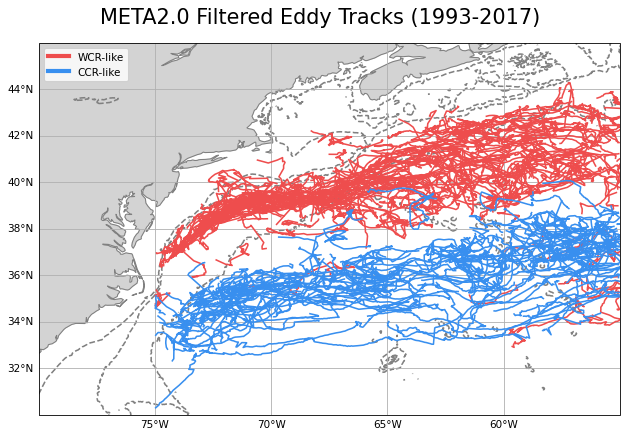

In [3]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  all_eddy_tracks_map(eddy_ccr_df, eddy_wcr_df, bathy, title, fig_quality)                             "
"                                                                                                       "
" Input:                                                                                                "
"    eddy_ccr_df (DataFrame) : pandas dataframe of CCR-like eddies for all zones                        "
"    eddy_wcr_df (DataFrame) : pandas dataframe of WCR-like eddies for all zones                        "
"    bathy (DataArray)       : xarray DataArray of northwest atlantic bathymetry                        " 
"    title (Str)             : title of the figure, e.g. 'Map of the Northwest Atlantic'                "
"    fig_quality (Int)       : integer of what dpi the image will be set to (e.g., 100 dpi)             "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a map of all the eddie tracks for whole period                                           "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

all_eddy_tracks_map(m2_zone_ccrlike_eddies, m2_zone_wcrlike_eddies, bathy, 'META2.0 Filtered Eddy Tracks (1993-2017)', 75);


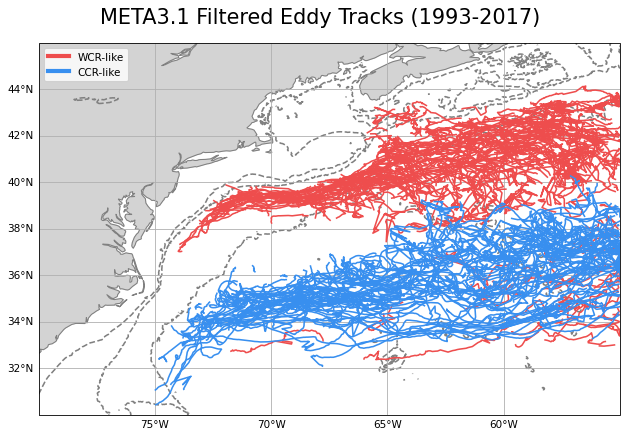

In [16]:
all_eddy_tracks_map(eddy_ccrlike_df, eddy_wcrlike_df, bathy, 'META3.1 Filtered Eddy Tracks (1993-2017)', 75);


### Spatial Distribution
Plot a bar plot by zone of formations for all ring-like eddies (1993-2017).

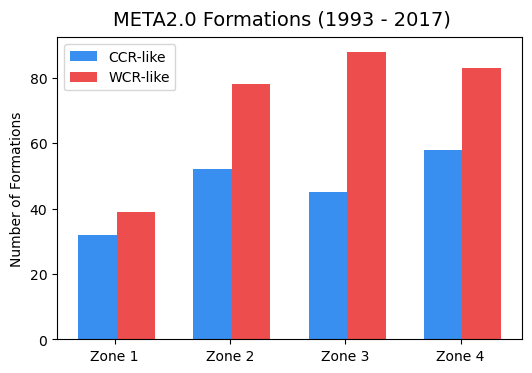

In [17]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  spatial_formations_barplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                 "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)             : title of the figure, e.g. 'Map of the Northwest Atlantic'                "
"    fig_quality (Int)       : integer of what dpi the image will be set to (e.g., 100 dpi)             "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a bar plot for distribution of formations by zone                                        "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

spatial_formations_barplot(m2_zone_ccrlike_yyyy_formations, m2_zone_wcrlike_yyyy_formations, 'META2.0 Formations ', 100);


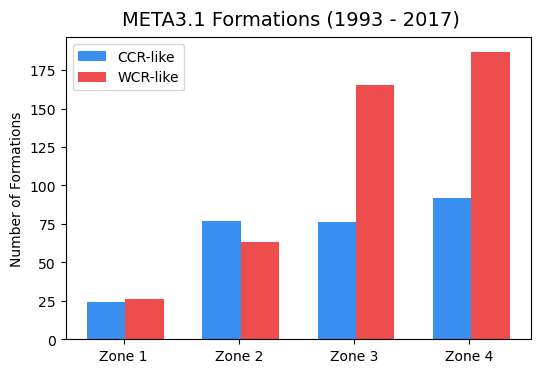

In [37]:
spatial_formations_barplot(m31_zone_ccrlike_yyyy_formations, m31_zone_wcrlike_yyyy_formations, 'META3.1 Formations ', 100);


### Seasonality
Plot a line plot of the seasonal cycle of formations for all ring-like eddies (1993-2017).

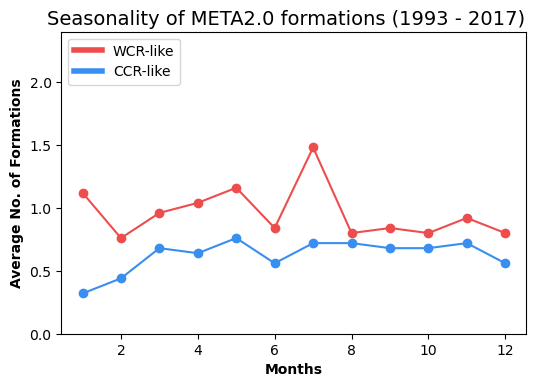

In [39]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  seasonality_lineplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                       "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
"    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a line plot of average monthly formations (seasonality)                                  "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

seasonality_lineplot(m2_zone_ccrlike_yyyy_mm_formations, m2_zone_wcrlike_yyyy_mm_formations, 'Seasonality of META2.0 formations ', 100);


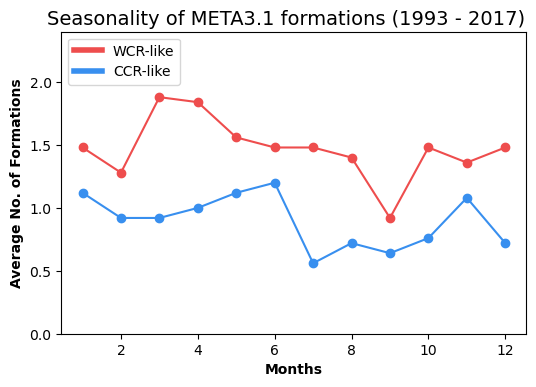

In [40]:
seasonality_lineplot(m31_zone_ccrlike_yyyy_mm_formations, m31_zone_wcrlike_yyyy_mm_formations, 'Seasonality of META3.1 formations ', 100);


### Regime Shift
Plot a line plot of the time-series for annual formations for all ring-like eddies (1993-2017).


#### Changepoint Analysis
Perform a changepoint analysis on the time-series and plot the results.

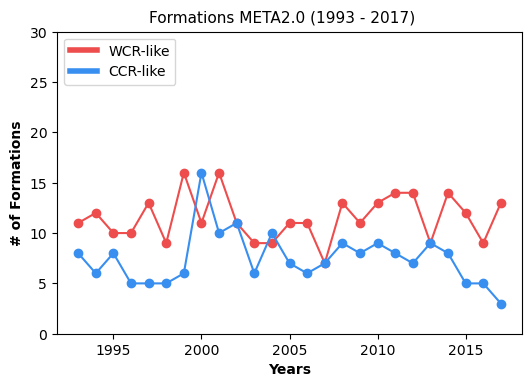

In [55]:
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""
"  timeseries_lineplot(ccr_formations_df, wcr_formations_df, title, fig_quality)                        "
"                                                                                                       "
" Input:                                                                                                "
"    ccr_formations_df (DataFrame) : pandas dataframe of cold core rings in all zones                   "
"    wcr_formations_df (DataFrame) : pandas dataframe of warm core rings in all zones                   "
"    title (Str)                   : title of the figure, e.g. 'Map of the Northwest Atlantic'          "
"    fig_quality (Int)             : integer of what dpi the image will be set to (e.g., 100 dpi)       "
"                                                                                                       "
" Output:                                                                                               "
"    * returns a line plot annual formations for whole period (time-series)                             "
"                                                                                                       "
"                                                                                                       "
"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""""

timeseries_lineplot(m2_zone_ccrlike_yyyy_formations, m2_zone_wcrlike_yyyy_formations, 'Formations META2.0 (', 100, 0, 30);


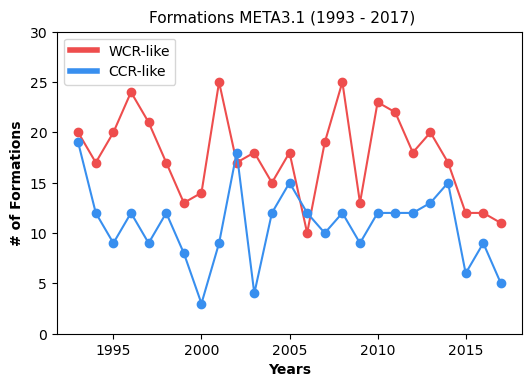

In [53]:

timeseries_lineplot(m31_zone_ccrlike_yyyy_formations, m31_zone_wcrlike_yyyy_formations, 'Formations META3.1 (', 100, 0, 30);


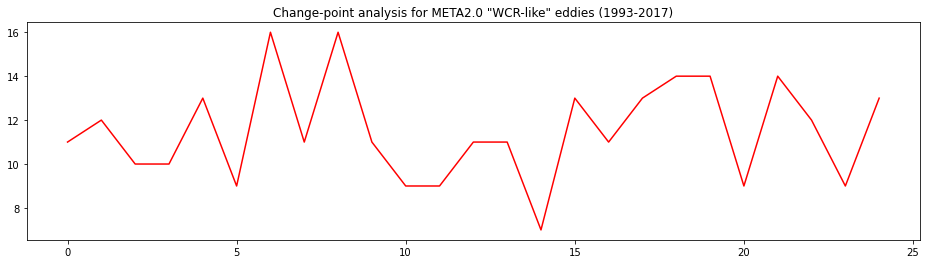

In [50]:
# make function for change point analysis
# also credit article for code


ts_df = m2_zone_wcrlike_yyyy_formations
ts = m2_zone_wcrlike_yyyy_formations['all_zones']

import ruptures as rpt

def plot_change_points_ruptures(df, ts, ts_change_all, title):
    
    plt.figure(figsize=(16,4))
    plt.plot(df.index, ts, color='r')
    for x in [df.iloc[idx-1].name for idx in ts_change_all]:
        plt.axvline(x, lw=2, color='red')

    plt.title(title)
    plt.show()
    

tsd = np.array(m2_zone_wcrlike_yyyy_formations['all_zones'])

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=3) #penalty
plot_change_points_ruptures(ts_df, tsd, change_points[:-1], 'Change-point analysis for META2.0 "WCR-like" eddies (1993-2017)')


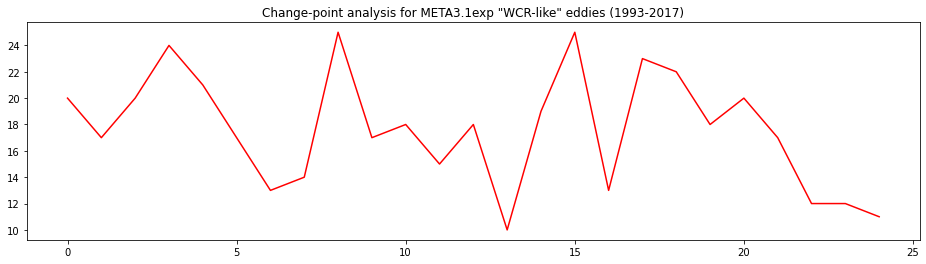

In [51]:
# make function for change point analysis
# also credit article for code

ts_df = m31_zone_wcrlike_yyyy_formations
ts = m31_zone_wcrlike_yyyy_formations['all_zones']

import ruptures as rpt

def plot_change_points_ruptures(df, ts, ts_change_all, title):
    
    plt.figure(figsize=(16,4))
    plt.plot(df.index, ts, color='r')
    for x in [df.iloc[idx-1].name for idx in ts_change_all]:
        plt.axvline(x, lw=2, color='red')

    plt.title(title)
    plt.show()
    

tsd = np.array(m31_zone_wcrlike_yyyy_formations['all_zones'])

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=3) #penalty
plot_change_points_ruptures(ts_df, tsd, change_points[:-1], 'Change-point analysis for META3.1exp "WCR-like" eddies (1993-2017)')


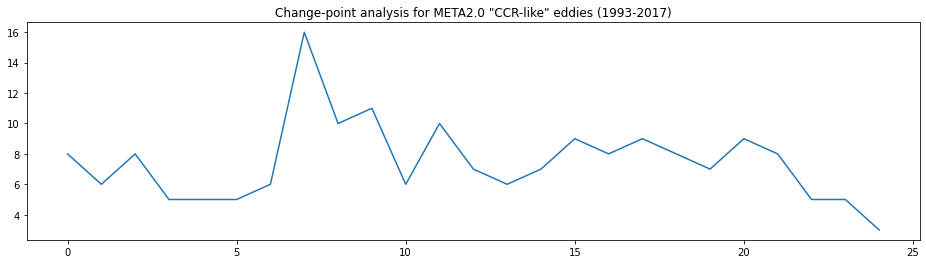

In [49]:
# make function for change point analysis
# also credit article for code

ts_df = m2_zone_ccrlike_yyyy_formations
ts = m2_zone_ccrlike_yyyy_formations['all_zones']

import ruptures as rpt

def plot_change_points_ruptures(df, ts, ts_change_all, title):
    
    plt.figure(figsize=(16,4))
    plt.plot(df.index, ts)
    for x in [df.iloc[idx-1].name for idx in ts_change_all]:
        plt.axvline(x, lw=2, color='red')

    plt.title(title)
    plt.show()
    

tsd = np.array(m2_zone_ccrlike_yyyy_formations['all_zones'])

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=3) #penalty
plot_change_points_ruptures(ts_df, tsd, change_points[:-1], 'Change-point analysis for META2.0 "CCR-like" eddies (1993-2017)')


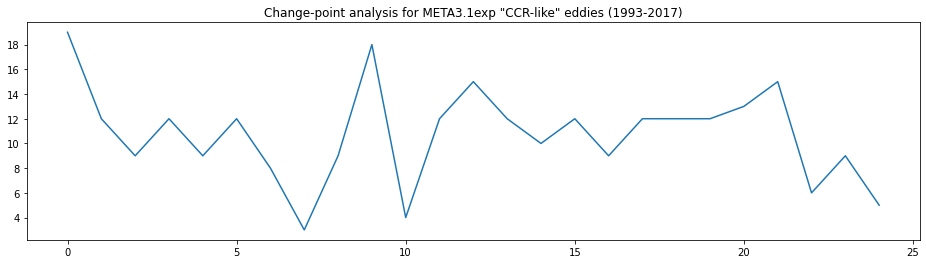

In [52]:
# make function for change point analysis
# also credit article for code

ts_df = m31_zone_ccrlike_yyyy_formations
ts = m31_zone_ccrlike_yyyy_formations['all_zones']

import ruptures as rpt

def plot_change_points_ruptures(df, ts, ts_change_all, title):
    
    plt.figure(figsize=(16,4))
    plt.plot(df.index, ts)
    for x in [df.iloc[idx-1].name for idx in ts_change_all]:
        plt.axvline(x, lw=2, color='red')

    plt.title(title)
    plt.show()
    

tsd = np.array(m31_zone_ccrlike_yyyy_formations['all_zones'])

detector = rpt.Pelt(model="rbf").fit(tsd)
change_points = detector.predict(pen=3) #penalty
plot_change_points_ruptures(ts_df, tsd, change_points[:-1], 'Change-point analysis for META3.1exp "CCR-like" eddies (1993-2017)')
